In [5]:
import numpy as np
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import DBSCAN

# from sklearn.datasets import make_moons
# from sklearn.datasets import make_blobs
# from sklearn.datasets import fetch_lfw_people
# people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

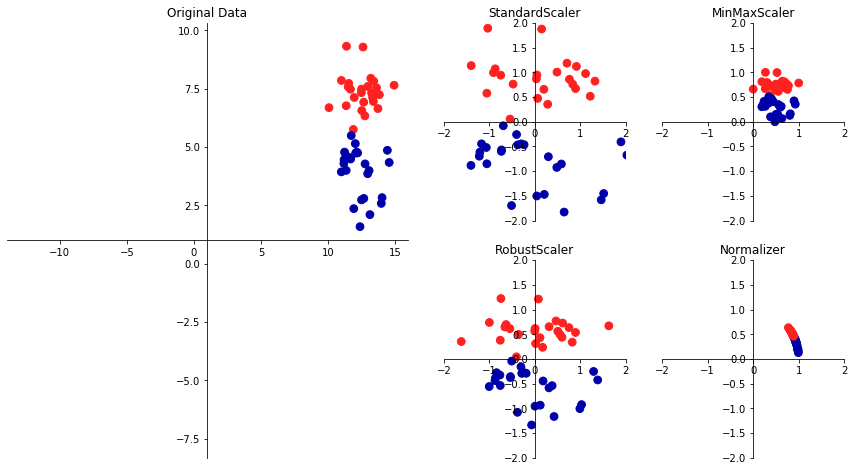

In [2]:
mglearn.plots.plot_scaling()

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


###### MinMaxScaler()
######  ㄴ test_set에 train_set과 동일한 변환을 적용해야함!

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train.min(axis=0))
print(X_train.max(axis=0))
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))
print(X_test_scaled.min(axis=0))
print(X_test_scaled.max(axis=0))

[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.    

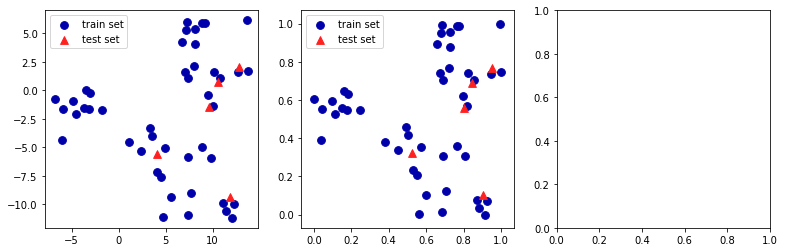

In [17]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# np.unique(_, return_counts=True)
X_train, X_test= train_test_split(X, random_state=5, test_size=.1)

fig, axes = plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1],
               c=mglearn.cm2.colors[0], label="train set", s=60)
axes[0].scatter(X_test[:,0], X_test[:,1], marker='^',
               c=mglearn.cm2.colors[1], label='test set', s=60)
axes[0].legend(loc = 2)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],
               c=mglearn.cm2.colors[0], label="train set", s=60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], marker='^',
               c=mglearn.cm2.colors[1], label='test set', s=60)
axes[1].legend(loc = 2)

###### 지도학습에서 scaling 효과

In [18]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("{:.2f}".format(svm.score(X_test, y_test)))

0.63


C:\Users\WG1120\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(C=100)
svm.fit(X_train_scaled, y_train)
print("{:.2f}".format(svm.score(X_test_scaled, y_test)))

0.97


C:\Users\WG1120\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(C=100)
svm.fit(X_train_scaled, y_train)
print("{:.2f}".format(svm.score(X_test_scaled, y_test)))

0.96


###### PCA

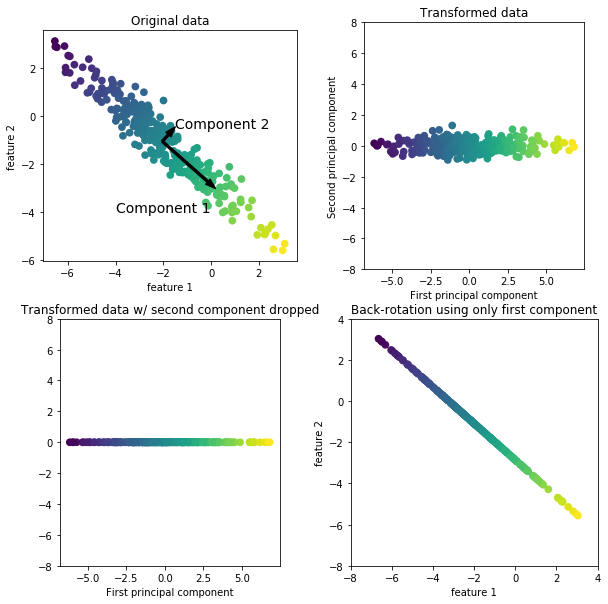

In [15]:
mglearn.plots.plot_pca_illustration()

###### 특성별 히스토그램 그리기

In [9]:
np.histogram(cancer.data[:,3], bins=50)
# bins.shape

(array([ 4,  9, 19, 29, 32, 56, 56, 56, 41, 42, 28, 29, 17, 15, 12,  6, 12,
        12,  8,  9,  9, 11, 10, 11, 10,  4,  4,  1,  4,  1,  0,  0,  4,  0,
         2,  0,  2,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  2],
       dtype=int64),
 array([ 143.5 ,  190.65,  237.8 ,  284.95,  332.1 ,  379.25,  426.4 ,
         473.55,  520.7 ,  567.85,  615.  ,  662.15,  709.3 ,  756.45,
         803.6 ,  850.75,  897.9 ,  945.05,  992.2 , 1039.35, 1086.5 ,
        1133.65, 1180.8 , 1227.95, 1275.1 , 1322.25, 1369.4 , 1416.55,
        1463.7 , 1510.85, 1558.  , 1605.15, 1652.3 , 1699.45, 1746.6 ,
        1793.75, 1840.9 , 1888.05, 1935.2 , 1982.35, 2029.5 , 2076.65,
        2123.8 , 2170.95, 2218.1 , 2265.25, 2312.4 , 2359.55, 2406.7 ,
        2453.85, 2501.  ]))

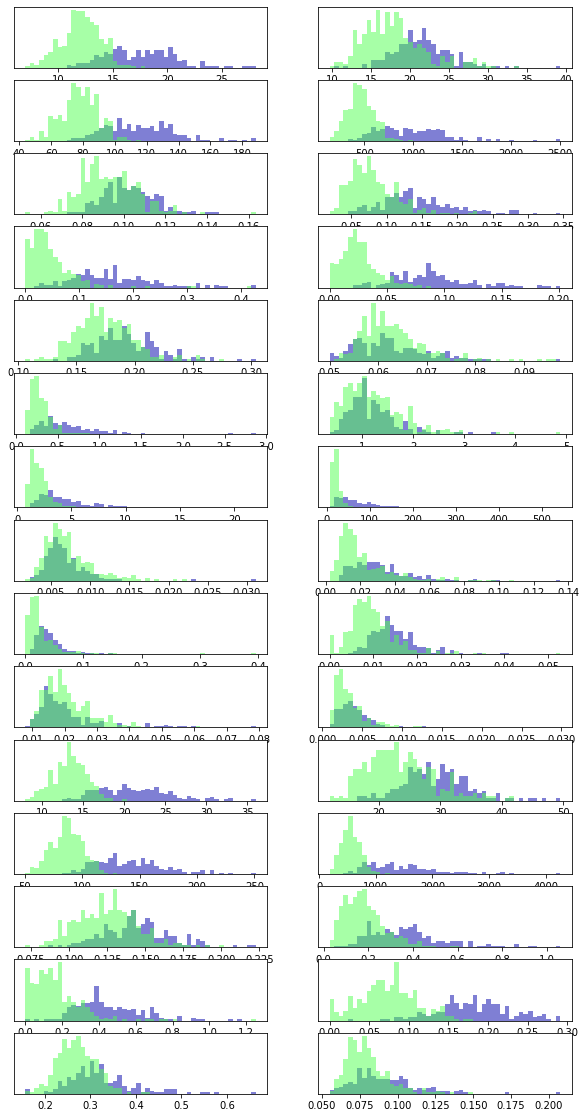

In [24]:
fix, axes = plt.subplots(15, 2, figsize = (10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2, alpha=.5))
    ax[i].set_yticks(())
fig.tight_layout()

In [22]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print(X_scaled.shape, X_pca.shape)

(569, 30) (569, 2)


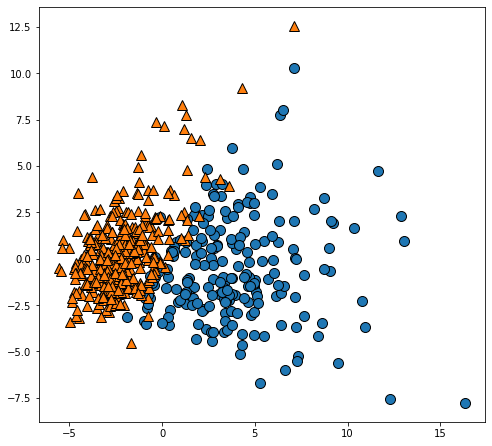

In [24]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.gca().set_aspect("equal")

In [25]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

([<matplotlib.axis.XTick at 0x1afc08d47f0>,
 <a list of 30 Text xticklabel objects>)

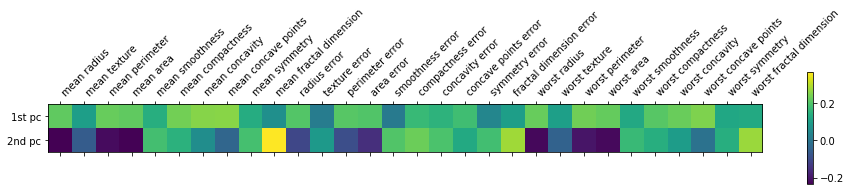

In [32]:
plt.matshow(pca.components_, cmap='viridis')
# plt.matshow(pca.components_)
plt.yticks([0 ,1], ["1st pc", "2nd pc"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names, rotation=45, ha='left')

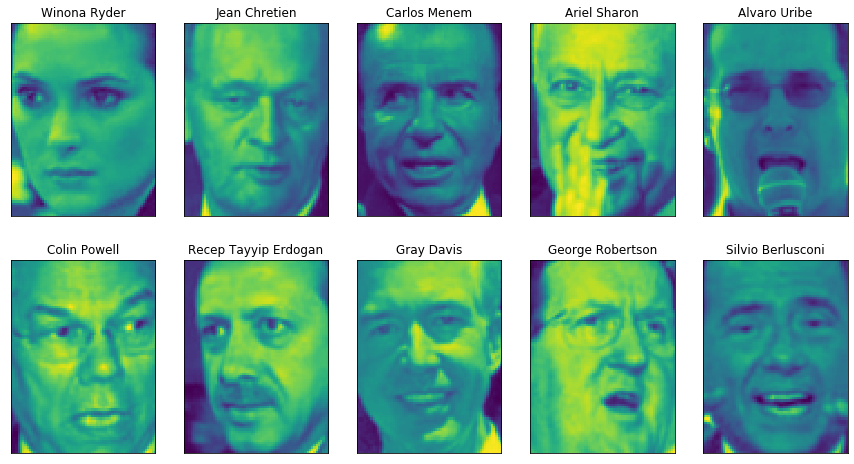

In [7]:
# from sklearn.datasets import fetch_lfw_people
# people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15,8),
                        subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

###### people 저장

In [52]:
import pickle
pickle.dump(people, open("people", "wb"))

###### people 불러오기

In [3]:
import pickle
people = pickle.load(open("people", "rb"))

In [5]:
print(people.images.shape)
print(people.target_names.shape)

(3023, 87, 65)
(62,)


In [21]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25}{1:3}".format(name, count), end='   ')
    if (i+1) % 3 ==0:
        print()

Alejandro Toledo          39   Alvaro Uribe              35   Amelie Mauresmo           21   
Andre Agassi              36   Angelina Jolie            20   Ariel Sharon              77   
Arnold Schwarzenegger     42   Atal Bihari Vajpayee      24   Bill Clinton              29   
Carlos Menem              21   Colin Powell             236   David Beckham             31   
Donald Rumsfeld          121   George Robertson          22   George W Bush            530   
Gerhard Schroeder        109   Gloria Macapagal Arroyo   44   Gray Davis                26   
Guillermo Coria           30   Hamid Karzai              22   Hans Blix                 39   
Hugo Chavez               71   Igor Ivanov               20   Jack Straw                28   
Jacques Chirac            52   Jean Chretien             55   Jennifer Aniston          21   
Jennifer Capriati         42   Jennifer Lopez            21   Jeremy Greenstock         24   
Jiang Zemin               20   John Ashcroft             53 

###### 각 인물별로 얼굴사진이 50개가 넘지않게 조절

In [4]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# 0~255사이에 있는 흑백 이미지 픽셀 값을 0~1 스케일로 조정
X_people = X_people / 255.

######## PCA 적용 전에는 Accuracy가 23.2%밖에 안 나온다

In [71]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify = y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.23255813953488372


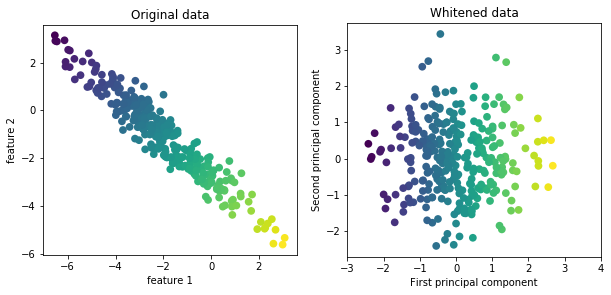

In [74]:
mglearn.plots.plot_pca_whitening()

######## PCA 적용이후 Accuracy가 31%로 상승

In [75]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train.shape, X_train_pca.shape)

(1547, 5655) (1547, 100)


In [77]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("{:.2f}".format(knn.score(X_test_pca, y_test)))

0.31


(100, 5655)


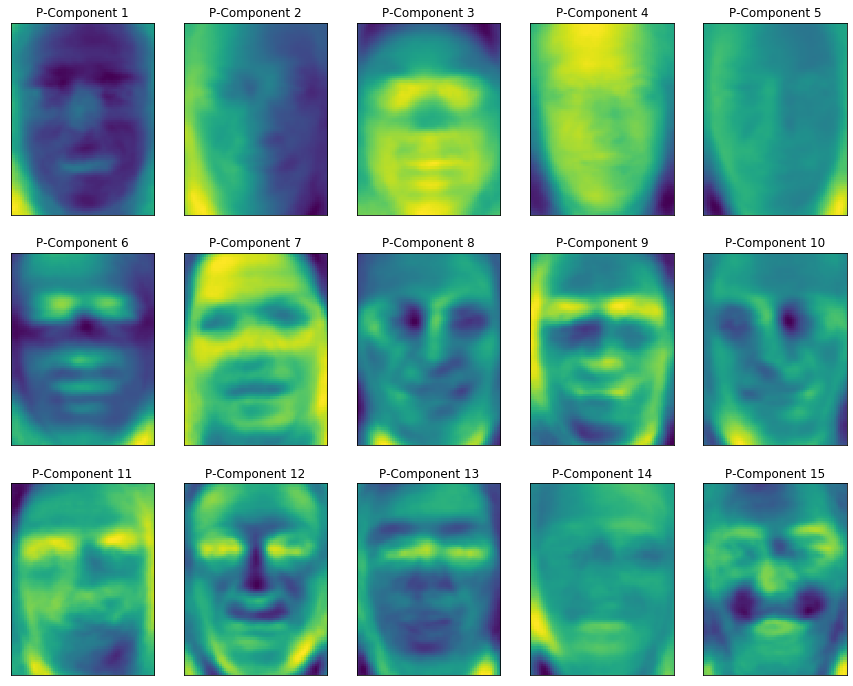

In [86]:
print(pca.components_.shape)  # (100, 5655)
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                        subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
#     ax.imshow(component.reshape(image_shape))
    ax.set_title("P-Component {}".format((i + 1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[136.66667, ...,  62.     ],
       ...,
       [ 11.     , ..., 152.     ]], dtype=float32), 
array([[ 60.666668, ...,  68.666664],
       ...,
       [102.      , ...,  65.      ]], dtype=float32))
________________________________________________________pca_faces - 3.9s, 0.1min


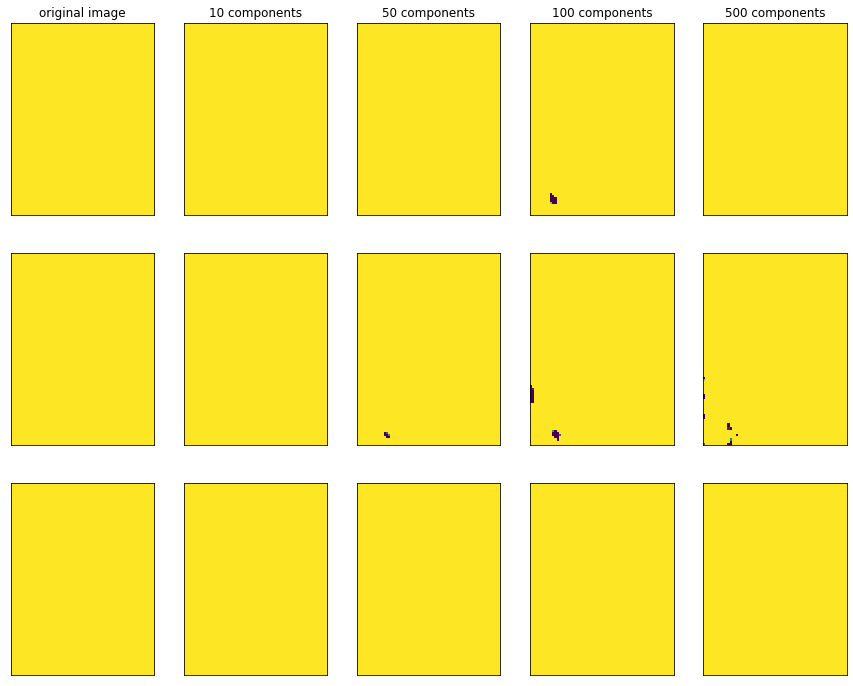

In [87]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

######## cancer Data PCA 변환 후 산점도 그리기

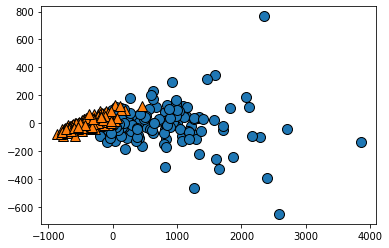

In [90]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, random_state=1)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)
# print(X_scaled.shape, X_pca.shape)
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], y_train)

###### NMF Decomposition

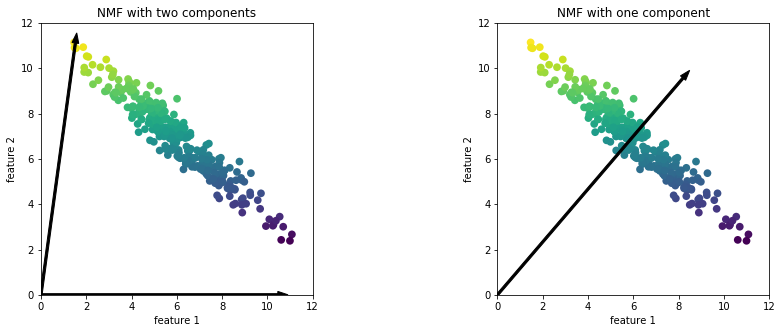

In [2]:
mglearn.plots.plot_nmf_illustration()

In [9]:
# 오래걸린다 -_-^
# X_people = people.data
# y_people = people.target
# image_shape = people.images[0].shape
# X_train, X_test, y_train, y_test = train_test_split(
#     X_people, y_people, stratify = y_people, random_state=0)
# mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

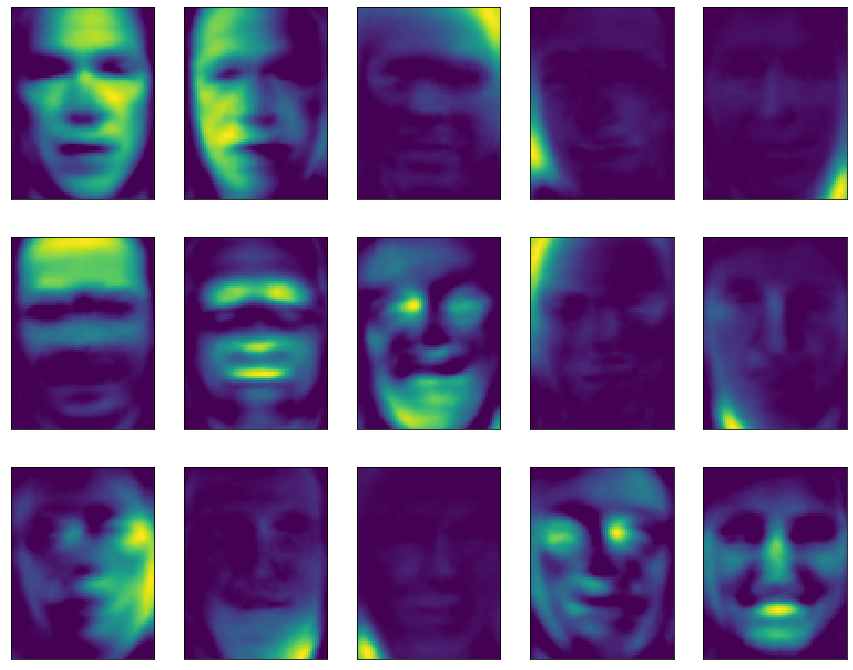

In [10]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                        subplot_kw = {'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))

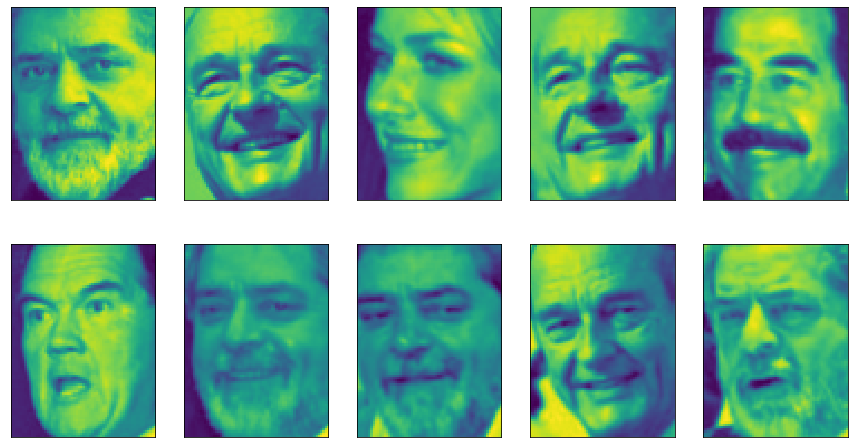

In [25]:
# compn = 3
compn = 7
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks':(), 'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Sign')

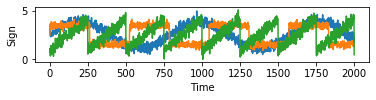

In [28]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
# plt.plot(S, '-')
plt.plot(S)
plt.xlabel("Time")
plt.ylabel("Sign")

In [37]:
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
# A.T.shape  # (3, 100)
# S.shape    # (2000, 3)
# X.shape    # (2000, 100)

(3, 100)

########## nmf -> 3개 신호로 복원

In [38]:
nmf = NMF(n_components = 3, random_state=42)
S_ = nmf.fit_transform(X)
print(S_.shape)

(2000, 3)


########## pca -> 3개 신호로 복원

In [39]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)
print(H.shape)

(2000, 3)


########## 복원결과

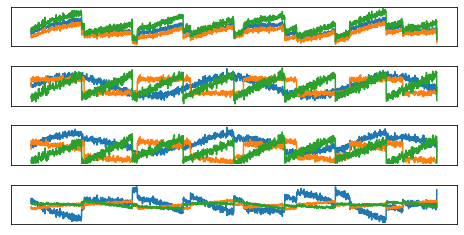

In [40]:
models = [X, S, S_, H]
names = ['obs', 'Orgnl', 'nmf', 'pca']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace':.5},
                        subplot_kw={'xticks':(),'yticks':()})
for model, name, ax in zip(models, names, axes):
    ax.plot(model[:,:3], '-')

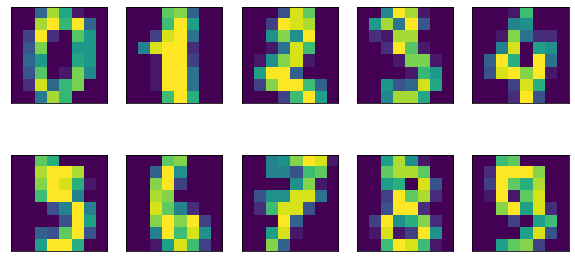

In [41]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10,5),
                        subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

######## pca를 활용한 손글씨 분류 

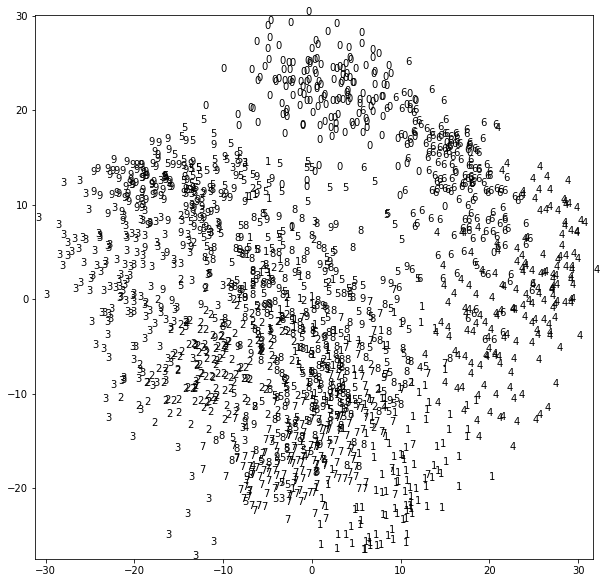

In [47]:
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
# colors = [,,,]  # 생략
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]))

######## t-SNE를 활용한 손글씨 분류

In [48]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

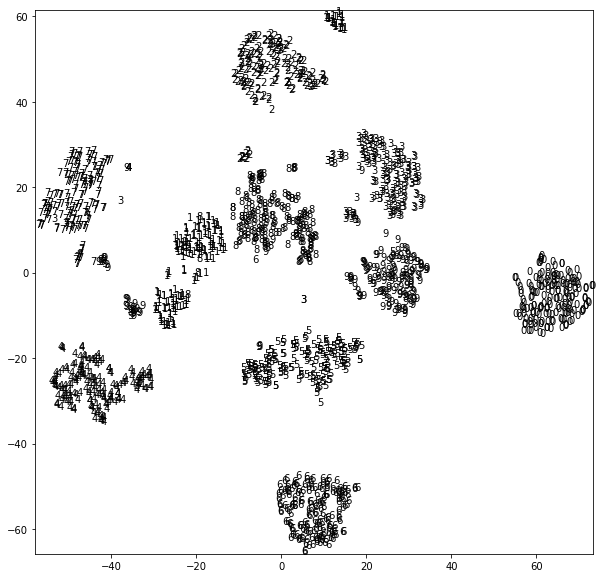

In [50]:
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]))

#### K-means Clustering

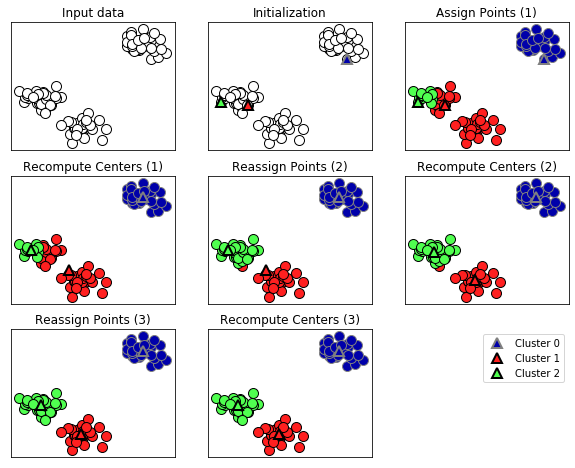

In [2]:
mglearn.plots.plot_kmeans_algorithm()

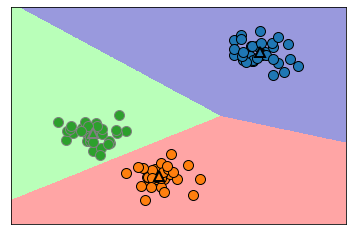

In [3]:
mglearn.plots.plot_kmeans_boundaries()

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

######## 데이터 요약

-11.855694368099854 0.5260155005846419
-10.588065868731183 6.506745005322004


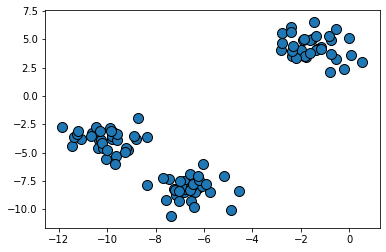

In [16]:
print(X[:,0].min(), X[:,0].max())
print(X[:,1].min(), X[:,1].max())
mglearn.discrete_scatter(X[:,0], X[:,1])

In [17]:
print(kmeans.labels_)

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


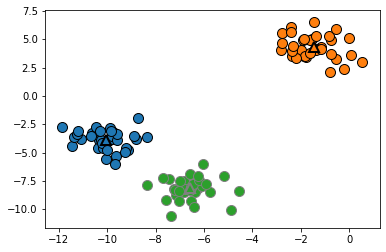

In [18]:
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2],
    markers='^', markeredgewidth=2)

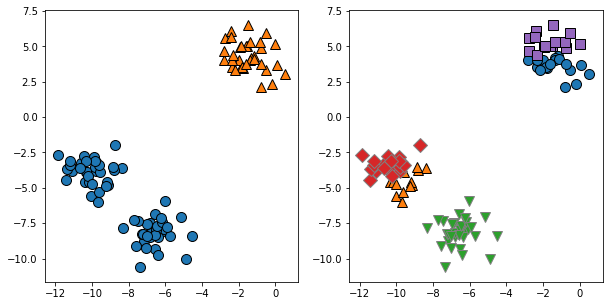

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 2개의 클러스터 중심 사용
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 5개의 클러스터 중심 사용
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

###### K-means 알고리즘이 실패하는 경우

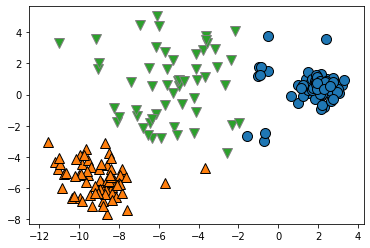

In [50]:
X_varied, y_varied = make_blobs(n_samples = 200,
                               cluster_std=[1.0, 2.5, 0.5],
                               random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:,0], X_varied[:, 1], y_pred)

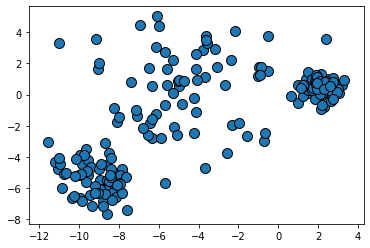

In [48]:
# X_varied.shape  # (200, 2)
# y_varied.shape  # (200,)
# mglearn.discrete_scatter(X_varied[:, 0], X_varied[:,1])
# unique, counts = np.unique(y_varied, return_counts = True)
# dict(zip(unique, counts))

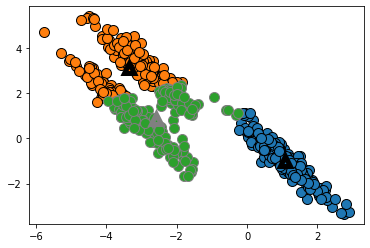

In [45]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 그래프
mglearn.discrete_scatter(X[:,0], X[:, 1], y_pred, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2],
    markers='^', markeredgewidth = 5)

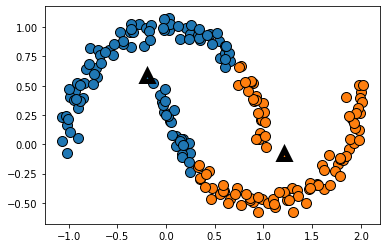

In [51]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 그래프
mglearn.discrete_scatter(X[:,0], X[:, 1], y_pred, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1],
    markers='^', markeredgewidth = 5)

###### pca, nmf, kmeans 각각으로 변환 -> 복원 시 모습

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=42)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

# X_test를 변환 후 다시 원래 좌표로 복원
X_recon_pca = pca.inverse_transform(pca.transform(X_test))
# 각 원소가 속한 클러스터들의 좌표 값
X_recon_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_recon_nmf = np.dot(nmf.transform(X_test), nmf.components_)

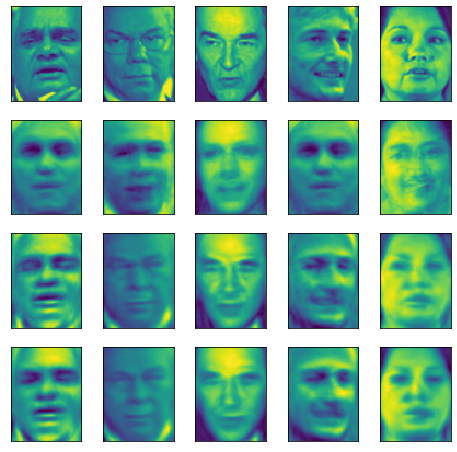

In [51]:
image_shape = people.images[0].shape
fig, axes = plt.subplots(4, 5, figsize=(8,8), subplot_kw={'xticks':(), 'yticks':()})
# for ax, comp_kmeans, comp_pca, comp_nmf in zip(
#         axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
#     ax[0].imshow(comp_kmeans.reshape(image_shape))
#     ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
#     ax[2].imshow(comp_nmf.reshape(image_shape))
    
# fig.subtitle("재구성")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_recon_kmeans, X_recon_pca, X_recon_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

In [42]:
# X_test.shape  # (516, 5655)
# pca.transform(X_test).shape  # (516, 100)
# kmeans.predict(X_test).shape  # (516,)
# X_recon_kmeans.shape
# X_recon_pca.shape
# nmf.transform(X_test).shape  # (516, 100)
# axes.T.shape

(5, 3)

###### 10개의 클러스터로 make_moon 데이터 분류

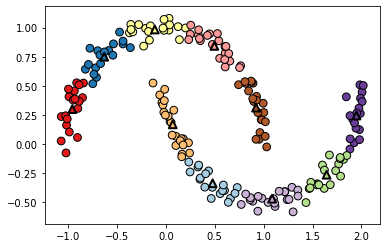

In [63]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
# plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=60,
           marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired',
           edgecolors='black')

###### 각 클러스터로부터의 거리 나타내기

In [64]:
distance_features = kmeans.transform(X)
print(distance_features.shape)
distance_features[:10,:]

(200, 10)


array([[0.9220768 , 1.46553151, 1.13956805, 0.45416272, 1.78820579,
        0.82573711, 1.02576102, 1.16559918, 1.03852189, 0.23340263],
       [1.14159679, 2.51721597, 0.1199124 , 1.66005101, 2.66446252,
        1.64355994, 0.53925926, 0.70700803, 2.20414144, 0.98271691],
       [0.78786246, 0.77354687, 1.74914157, 0.7688191 , 0.93673651,
        0.13801913, 1.3332387 , 1.97061341, 0.71561277, 0.94399739],
       [1.52210195, 0.91333213, 2.67200089, 1.77368188, 0.38105696,
        1.11876518, 2.14463873, 2.98819457, 1.39508846, 1.98219211],
       [1.29924189, 2.56808346, 0.15344916, 1.62551083, 2.7645745 ,
        1.73068781, 0.74210756, 0.45417214, 2.20594428, 0.97346025],
       [1.4345251 , 2.63482287, 0.32451594, 1.64484591, 2.86024874,
        1.82471133, 0.90214502, 0.29526528, 2.24366384, 1.02387307],
       [0.73820469, 1.69401202, 0.81891374, 0.79373651, 1.93455121,
        0.90598836, 0.68714777, 0.97495538, 1.33506344, 0.11601783],
       [0.43792391, 1.96030014, 0.7889472

###### 병합군집을 활용한 make_blobs 데이터 분류

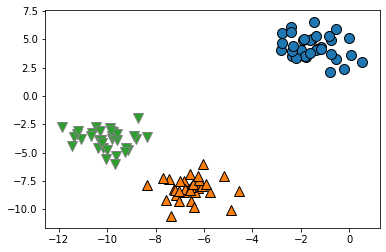

In [68]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)

#### 덴도그램 그리기

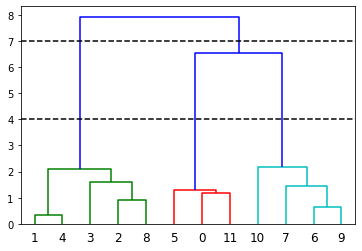

In [78]:
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=0, n_samples=12)
linkage_array = ward(X)
dendrogram(linkage_array)

# 커트라인 그리기
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7, 7], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

###### DBSCAN은 Neighborhood를 포함시켜나가는 알고리즘 -> 2Moon Data와 같은 것도 분류가능

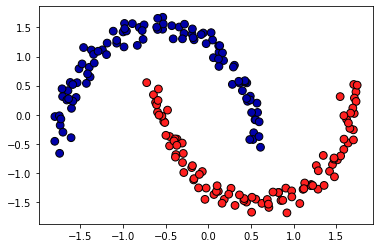

In [8]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 스케일 조정
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60,
           edgecolors='black')